<a href="https://colab.research.google.com/github/roisanwr/Water-Potability-Clasification/blob/main/KNN%20Training%20Water%20Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

water_df = pd.read_csv('water_potability.csv')
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
water_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [5]:
water_df.isnull().sum() * 100 / water_df.shape[0]

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [6]:
water_df["ph"] = water_df["ph"].fillna(value = water_df["ph"].median())
water_df["Sulfate"] = water_df["Sulfate"].fillna(value = water_df["Sulfate"].median())
water_df["Trihalomethanes"] = water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median())

water_df.isnull().sum() * 100 / water_df.shape[0]

,0
ph,0.0
Hardness,0.0
Solids,0.0
Chloramines,0.0
Sulfate,0.0
Conductivity,0.0
Organic_carbon,0.0
Trihalomethanes,0.0
Turbidity,0.0
Potability,0.0


In [7]:
water_df.Potability.value_counts()

,count
Potability,
0,1998
1,1278


<Axes: xlabel='Potability', ylabel='count'>

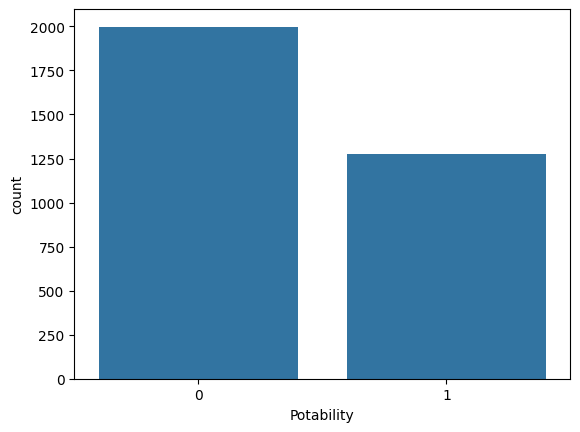

In [8]:
# Create a countplot for target class.
sns.countplot(x=water_df['Potability'])

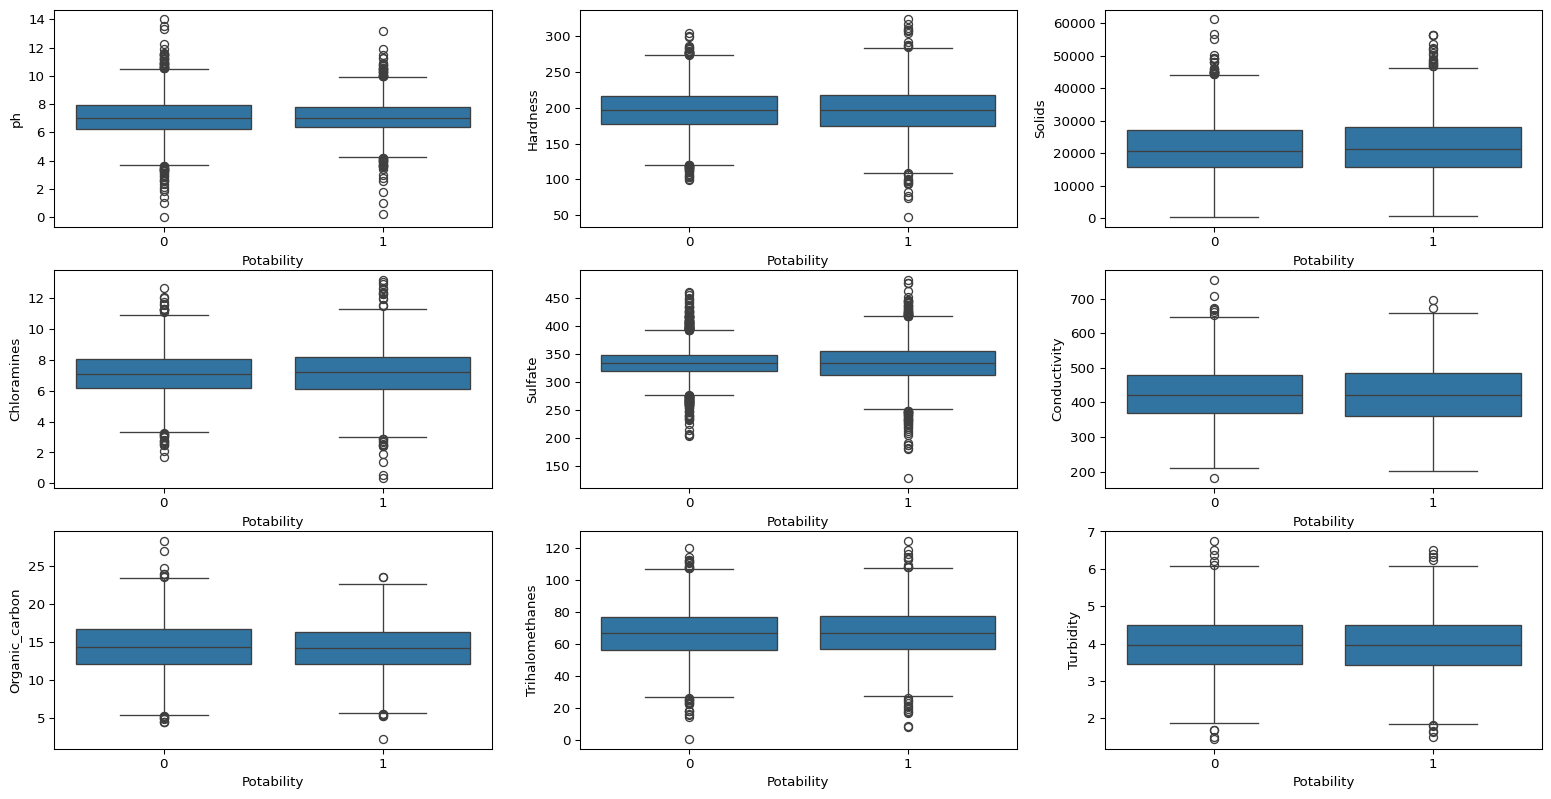

In [9]:
# Create boxplots for 'water_df' columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), dpi = 96, sharex = False)
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'Potability', y = column, data = water_df, ax = axis[i, j])
    count = count + 1

plt.show()

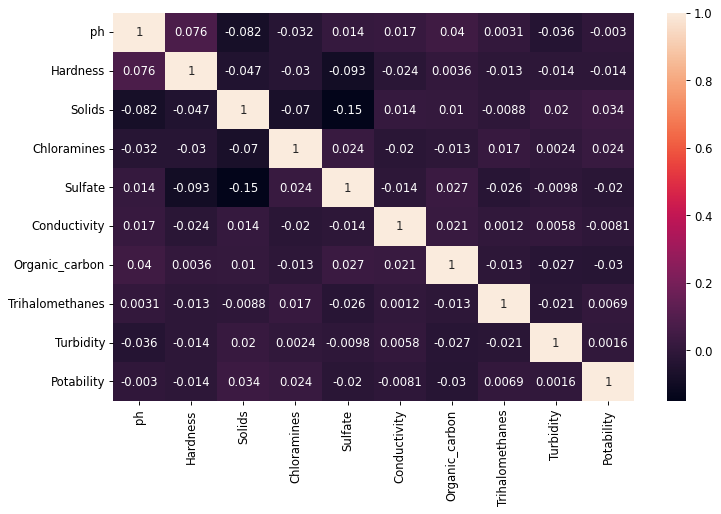

In [10]:
# Check the correlation of features
corr_df = water_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

In [11]:
# Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [12]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features_df)
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


In [13]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)


In [14]:
#  Train kNN classifier model for 'k = 3'
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3.score(X_train, y_train))
print("Test set accuracy:", knn3.score(X_test, y_test))

Train set accuracy: 0.8146532926297427
Test set accuracy: 0.612410986775178


In [15]:
#  Train kNN classifier model for 'k = 7'
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn7.score(X_train, y_train))
print("Test set accuracy:", knn7.score(X_test, y_test))

Train set accuracy: 0.7313563017880506
Test set accuracy: 0.6185147507629705


Sedang melatih model untuk mencari K terbaik...


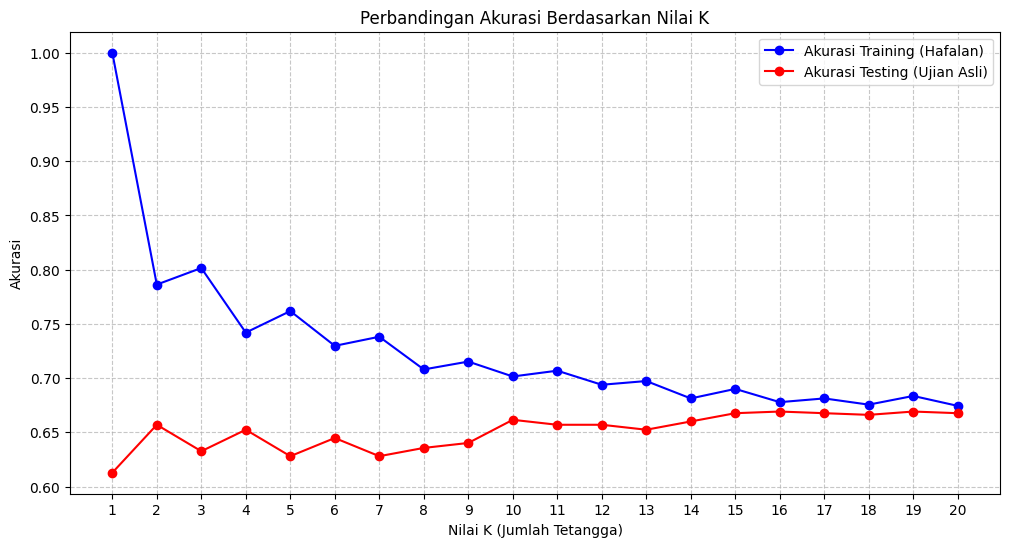

✅ REKOMENDASI: Nilai K terbaik adalah 16
📊 Akurasi tertinggi yang bisa didapat: 66.92%


In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# List untuk menyimpan hasil akurasi
accuracy_train = []
accuracy_test = []
k_range = range(1, 21) # Mencoba K dari 1 sampai 20

print("Sedang melatih model untuk mencari K terbaik...")

for k in k_range:
    # 1. Buat model dengan K saat ini
    knn = KNeighborsClassifier(n_neighbors=k)

    # 2. PENTING: Latih dengan data yang sudah di-SCALING (X_train_scaled)
    # Jangan pakai X_train biasa, nanti hasilnya bias!
    knn.fit(X_train_scaled, y_train)

    # 3. Hitung skor akurasi (pakai data scaled juga)
    accuracy_train.append(knn.score(X_train_scaled, y_train))
    accuracy_test.append(knn.score(X_test_scaled, y_test))

# --- Bagian Plotting Grafik ---
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Nilai K (Jumlah Tetangga)')
plt.ylabel('Akurasi')
plt.xticks(list(k_range))

# Gambar garis
plt.plot(k_range, accuracy_train, 'bo-', label='Akurasi Training (Hafalan)')
plt.plot(k_range, accuracy_test, 'ro-', label='Akurasi Testing (Ujian Asli)')
plt.legend()
plt.title('Perbandingan Akurasi Berdasarkan Nilai K')
plt.show()

# --- Output Rekomendasi ---
# Mencari skor tertinggi di data testing
best_score = max(accuracy_test)
best_k = k_range[accuracy_test.index(best_score)]

print(f"✅ REKOMENDASI: Nilai K terbaik adalah {best_k}")
print(f"📊 Akurasi tertinggi yang bisa didapat: {best_score:.2%}")

In [31]:
# Train kNN classifier model for 'k = 15'
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn15.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15.score(X_train, y_train))
print("Test set accuracy:", knn15.score(X_test, y_test))

Train set accuracy: 0.6519083969465649
Test set accuracy: 0.5899390243902439


In [32]:
#  Display the precision, recall and f1-score values.
from sklearn.metrics import classification_report
print(classification_report(y_test, knn15.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       412
           1       0.38      0.16      0.22       244

    accuracy                           0.59       656
   macro avg       0.50      0.50      0.47       656
weighted avg       0.54      0.59      0.54       656



In [33]:
testing = {
    'ph': [7.2],
    'Hardness': [150],
    'Solids': [20000],
    'Chloramines': [7.0],
    'Sulfate': [350],
    'Conductivity': [420],
    'Organic_carbon': [10],
    'Trihalomethanes': [70],
    'Turbidity': [3.5]
}

testing = pd.DataFrame(testing)
print(testing)

    ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  \
0  7.2       150   20000          7.0      350           420              10   

   Trihalomethanes  Turbidity  
0               70        3.5  


In [34]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Data Baru: ")
print(pred_coba)

Hasil Prediksi dari Data Baru: 
[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [35]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib # Library untuk menyimpan model agar bisa dipakai di aplikasi

# 1. Tentukan Fitur (X) dan Target (y)
# 'Potability' adalah target yang ingin diprediksi
X = water_df.drop('Potability', axis=1)
y = water_df['Potability']

# 2. Bagi data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling Data (SANGAT PENTING untuk KNN)
# Kita pakai StandardScaler agar semua fitur punya skala yang setara
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Training Model KNN
# Misalnya kita pakai k=5 (kamu bisa cari k terbaik nanti)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Cek akurasi sebentar
print("Akurasi Model:", knn_model.score(X_test_scaled, y_test))

Akurasi Model: 0.6280487804878049


In [25]:
# --- BAGIAN EXPORT UNTUK APLIKASI ---

# 1. Simpan Model KNN
# File ini berisi 'otak' yang sudah belajar membedakan air layak minum
joblib.dump(knn_model, 'knn_water_model.pkl')

# 2. PENTING: Simpan juga Scaler-nya!
# Aplikasi nanti wajib melakukan scaling yang PERSIS sama dengan data training.
# Kalau scaler tidak disimpan, prediksi di aplikasi akan ngawur.
joblib.dump(scaler, 'scaler_water.pkl')

print("Model dan Scaler berhasil disimpan! Siap dipakai untuk aplikasi.")

Model dan Scaler berhasil disimpan! Siap dipakai untuk aplikasi.


In [36]:
# --- KODE DOWNLOAD OTOMATIS (KHUSUS GOOGLE COLAB) ---
from google.colab import files

# Download Model
files.download('knn_water_model.pkl')

# Download Scaler
files.download('scaler_water.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>